En este Notebook, se presenta un conjunto de pasos para realizar el proceso de Extracción, Carga y Transformación sobre el cojunto de datos users_items con el proposito de construir un MVP (Minimum Viable Product) o Producto Mínimo Viable

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [11]:
# Leer y cargar los distintos dataset
ruta = "..\\Datasets\\"
datasets = ["users_items.parquet", "steam_games.parquet", "user_review.parquet" ]

df_items = pd.read_parquet(ruta + datasets[0])
df_game = pd.read_parquet(ruta + datasets[1])
df_reviews = pd.read_parquet(ruta + datasets[2])

In [12]:
# Observemos cantidad de filas y varibales por cada dataset que paso por el proceso de ETL
print(f'Dimensiones de los dataframes -> steam : {df_game.shape}, items : {df_items.shape}, reviews : {df_reviews.shape}')

Dimensiones de los dataframes -> steam : (68023, 6), items : (2916386, 4), reviews : (59305, 4)


Analisis Exploratorio para steam_games

In [13]:
df_game.head(3)

,genres,title,year,price,item_id,developer
88310,Action,Lost Summoner Kitty,2018,4.99,761140.0,Kotoshiro
88310,Casual,Lost Summoner Kitty,2018,4.99,761140.0,Kotoshiro
88310,Indie,Lost Summoner Kitty,2018,4.99,761140.0,Kotoshiro


In [14]:
# Algunas estadisticas 
total_game = len(df_game['item_id'].unique())
print(f'Total de Juegos : {total_game}')

Total de Juegos : 27461


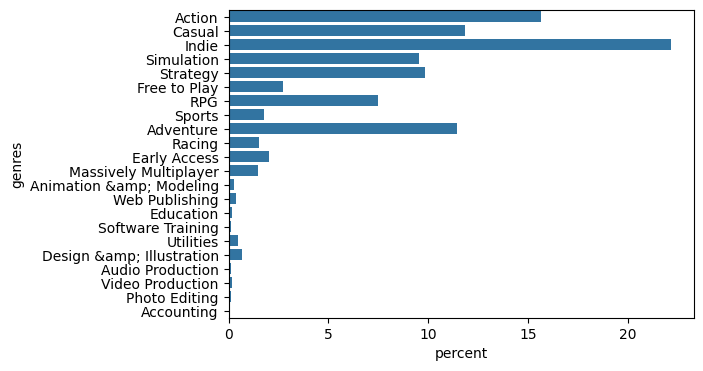

In [15]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_game, y='genres', orient='h', stat="percent")
plt.show()

In [17]:
# Conozcamos el precio promedio por genero y titulo 
df_game.groupby(["genres","title"])["price"].mean().to_frame(name="mean_price").reset_index().head(5)

,genres,title,mean_price
0,Accounting,Multiplicity,19.99
1,Accounting,MyMoney,0.00
2,Accounting,Professor Teaches QuickBooks 2017,14.99
3,Accounting,Quicken Legal Business Pro,44.99
4,Accounting,Quicken WillMaker Plus 2016,59.99


Analisis Exploratorio para users_items

In [18]:
# Observemos los datos de este dataset 
df_items.head(3)

,user_id,items_count,playtime_forever,playtime_2weeks
0,76561197970982479,277,6.0,0.0
1,76561197970982479,277,0.0,0.0
2,76561197970982479,277,7.0,0.0


Analisis Exploratorio para user_review